In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

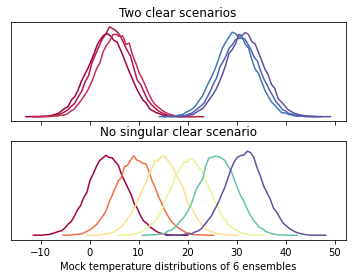

In [76]:
fig, (first, second) = plt.subplots(2,1, sharex=True, sharey=True, figsize=(6, 4))
#plt.tight_layout()
obs = 30000
bins = 50
palette = 'Spectral'

for ax, vals in ((first, (4, 5, 6, 30, 31, 32)), (second, np.linspace(4, 32, 6))):
    data = []
    for i in vals:
        y, x = np.histogram(np.random.normal(i, 4, obs), bins=bins)
        for j, v in enumerate(y):
            data.append({'x':x[j], 'y':v, 'i': i})
    
    sns.lineplot(data=pd.DataFrame(data), x='x', y='y', hue='i', palette=palette, ax=ax, legend=False)


for d in (first, second):
    d.set(xlabel='Mock temperature distributions of 6 ensembles', ylabel=None, yticks=[])


first.set(title='Two clear scenarios')
second.set(title='No singular clear scenario')

fig.savefig('illustration.eps')

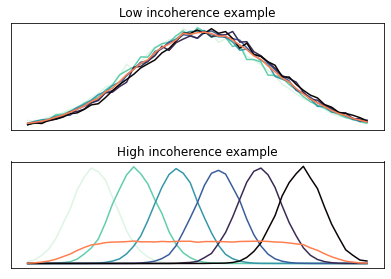

In [77]:
fig, (first, second) = plt.subplots(2,1, figsize=(6, 4))
plt.tight_layout()
obs = 30000
bins = np.linspace(-10,20,50)

for ax, vals, var in ((first, np.linspace(5,6,6), 6), (second, np.linspace(-4, 14, 6), 2)):
    data = []
    for i in vals:
        y, x = np.histogram(np.random.normal(i, var, obs), bins=bins)
        for j, v in enumerate(y):
            data.append({'x':x[j], 'y':v, 'i': i})
        
    df = pd.DataFrame(data)
    sns.lineplot(data=df, x='x', y='y', hue='i', palette='mako_r', ax=ax, legend=False)
    sns.lineplot(data=df.groupby('x').mean().reset_index(), x='x', y='y', ax=ax, color='coral')

for d in (first, second):
    d.set(ylabel=None, yticks=[], xticks=[], xlabel=None)


first.set(title='Low incoherence example')
second.set(title='High incoherence example')

fig.savefig('incoherence.eps')